# Vanilla RNN in PyTorch - Accuracy Plots

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
# Takes in a filename, plots a graph and saves a fig
def plotter(file):
    
    # Create df
    df = pd.read_csv(file, header = None)
    
    # Seq length and accuracies
    input_length = df.iloc[0, :]
    accuracies   = df.iloc[1, :]
    print(input_length)
    
    # Scatter plot
    plt.scatter(input_length, accuracies)
    
    # Save fig
    plt.savefig(file + '.png', format='png', bbox_inches = 'tight', pad_inches = 0)

# First bunch of RNN

0     5.0
1     6.0
2     8.0
3    10.0
4    12.0
5    14.0
6    16.0
7    18.0
8    20.0
Name: 0, dtype: float64


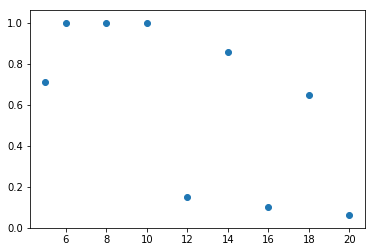

In [106]:
file = "accuracies-rnn-lowseq.csv"
plotter(file)

# Second bunch of RNN

0     5.0
1    10.0
2    20.0
3    40.0
4    80.0
Name: 0, dtype: float64


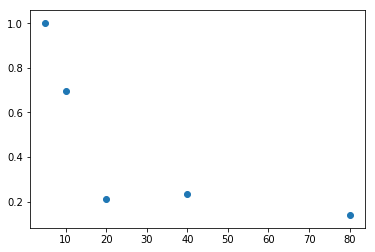

In [107]:
file = "accuracies-rnn-highseq.csv"
plotter(file)

# First bunch of LSTM

0     5.0
1     6.0
2     8.0
3    10.0
4    12.0
5    14.0
6    16.0
7    18.0
8    20.0
Name: 0, dtype: float64


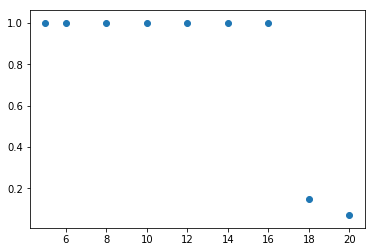

In [108]:
plotter("accuracies-lstm-lowseq.csv")

In [109]:
plotter("accuracies-lstm-highseq.csv")

0     5.0
1    10.0
2    20.0
3    25.0
4    40.0
5    80.0
Name: 0, dtype: float64


# Second bunch of LSTM

0     5.0
1    10.0
2    20.0
3    25.0
4    40.0
5    80.0
Name: 0, dtype: float64


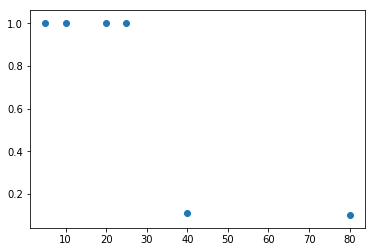

In [110]:
plotter("lstm2.csv")

# Gradient plots

In [111]:
lstmdf = pd.read_csv("lstmnorm.csv", header = None)
lstmdf

0             1             2             3             4   \
0  0.000000e+00  1.000000e+00  2.000000e+00  3.000000e+00  4.000000e+00   
1  1.567298e-17  2.064216e-17  2.744465e-17  3.641129e-17  4.807240e-17   

             5             6             7             8             9   \
0  5.000000e+00  6.000000e+00  7.000000e+00  8.000000e+00  9.000000e+00   
1  6.389272e-17  8.478968e-17  1.123435e-16  1.481477e-16  1.966307e-16   

     ...             90         91         92         93         94        95  \
0    ...      90.000000  91.000000  92.000000  93.000000  94.000000  95.00000   
1    ...       0.000002   0.000003   0.000004   0.000006   0.000008   0.00001   

          96         97         98         99  
0  96.000000  97.000000  98.000000  99.000000  
1   0.000014   0.000019   0.000026   0.001066  

[2 rows x 100 columns]

In [112]:
lstmtime = lstmdf.iloc[0,:]
lstmnorm = (lstmdf.iloc[1,:])
plt.plot(lstmtime, lstmnorm)
#plt.ylim(0,0.000000001)
plt.ylabel("Norm of Gradient Vector")
plt.xlim(100,0)
plt.xlabel("Timestep (Reverse Order)")

Text(0.5,0,'Timestep (Reverse Order)')

In [113]:
rnndf = pd.read_csv("rnnnorm.csv", header = None)
rnntime = rnndf.iloc[0,:]
rnnnorm = (rnndf.iloc[1,:])
plt.plot(rnntime, rnnnorm)
#plt.ylim(0,0.000000001)
plt.ylabel("Norm of Gradient Vector")
plt.xlim(100, 0)

plt.xlabel("Timestep (Reverse Order)")

Text(0.5,0,'Timestep (Reverse Order)')

In [115]:
plt.plot(rnntime, (rnnnorm),'--', label = "RNN")
plt.plot(rnntime, lstmnorm, '--', label = "LSTM")
plt.xlim(100,0)
plt.legend()
plt.yscale("log")
plt.ylabel("Norm of Gradient Vector (log scale)")
plt.xlabel("Timestep (Reverse Order)")
plt.savefig('gradients.png', format='png', bbox_inches = 'tight', pad_inches = 0)